In [12]:
using Pkg
Pkg.instantiate()

Precompiling project...
    346.9 ms  ✓ Griddata
  1 dependency successfully precompiled in 1 seconds. 285 already precompiled.


In [13]:
using Random, Statistics

nLon = 320
nLat = 384
shape = (nLat, nLon)
rng = MersenneTwister(42)

lon = rand(rng, shape...) .* 360.0    # Uniformly distributed in [0, 360)
lat = rand(rng, shape...) .* 180.0 .- 90.0  # Uniformly distributed in [-90, 90)

# Compute data array
deg2rad(x) = x * π / 180
data = cos.(deg2rad.(lon)) .+ sin.(deg2rad.(lat));

In [36]:
using NaturalNeighbours: interpolate

step = 1
rstep = 1

rlon = 0.0:rstep:359.0
rlat = -90.0:rstep:89.0

rlon2 = [ x for x in rlon, y in rlat]
rlat2 = [ y for x in rlon, y in rlat]

# Flatten the input data
lon_flat = vec(lon[1:step:end, 1:step:end])
lat_flat = vec(lat[1:step:end, 1:step:end])
data_flat = vec(data[1:step:end, 1:step:end])

# Use gridded interpolation
@time begin
    itp = interpolate(lon_flat, lat_flat, data_flat)
end
@time begin
    rdata = itp.(rlon2, rlat2)
end

358.370743 seconds (1.16 M allocations: 391.475 MiB, 0.14% gc time)
417.264291 seconds (21 allocations: 518.609 KiB)


360×180 Matrix{Float64}:
 -0.000188206   0.000474353  …  1.99703  1.99828  1.99931  1.99959
 -0.000115598   0.000149777     1.99735  1.99845  1.99918  1.99958
 -0.000765458  -0.000464752     1.99694  1.99798  1.99874  1.99918
 -0.00141532   -0.00121902      1.99612  1.99725  1.99798  1.99845
 -0.00421718   -0.00228323      1.99509  1.99616  1.99691  1.9974
 -0.00737506   -0.00371965   …  1.99371  1.99479  1.99554  1.99593
 -0.010533     -0.00542438      1.992    1.99306  1.99377  1.99436
 -0.0136908    -0.00734267      1.9901   1.99114  1.9919   1.99236
 -0.0168487    -0.00955779      1.98779  1.9888   1.98959  1.99008
 -0.0200066    -0.0121574       1.98522  1.98622  1.98699  1.98751
 -0.0231645    -0.0150421    …  1.98234  1.98339  1.98415  1.9846
 -0.0263224    -0.0182197       1.97916  1.98022  1.98099  1.98143
 -0.0294803    -0.0217265       1.97556  1.97666  1.97743  1.97795
  ⋮                          ⋱                             
 -0.0228787    -0.0217118       1.97568  1.976

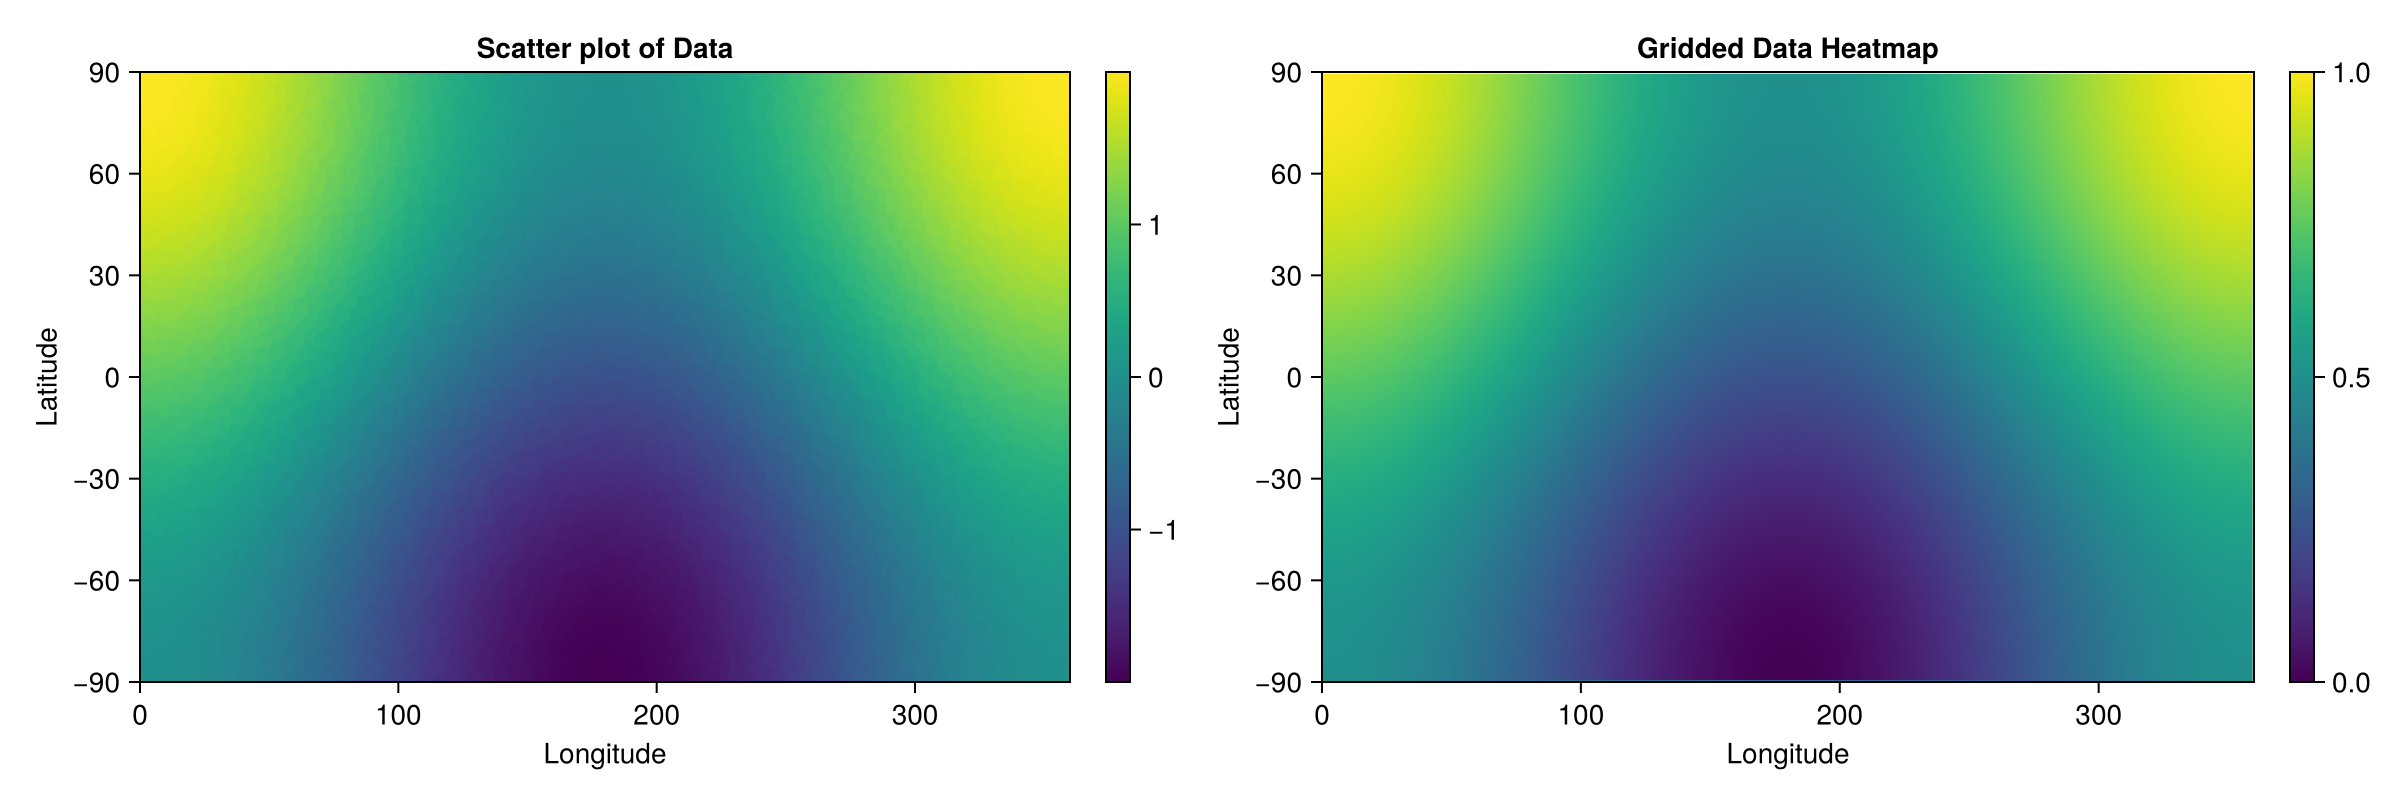

In [41]:
using CairoMakie

# Scatter plot
fig = Figure(size = (1200, 400))

ax1 = Axis(fig[1, 1][1, 1], title = "Scatter plot of Data", xlabel = "Longitude", ylabel = "Latitude")
xlims!(ax1, 0, 360)
ylims!(ax1, -90, 90)

h = scatter!(ax1, vec(lon), vec(lat), color = vec(data), colormap = :viridis, colorrange = extrema(data))
Colorbar(fig[1, 1][1, 2], h)

# Heatmap (gridded data)
ax2 = Axis(fig[1, 2][1, 1], title = "Gridded Data Heatmap", xlabel = "Longitude", ylabel = "Latitude")
hm = heatmap!(ax2, rlon, rlat, rdata, colormap = :viridis, colorrange = extrema(data))
Colorbar(fig[1, 2][1, 2])
xlims!(ax2, 0, 360)
ylims!(ax2, -90, 90)

# Display the figure
fig


In [ ]:
lon_flat = vec(lon)
lat_flat = vec(lat)
data_flat = vec(data)
points = Array(hcat(lon_flat, lat_flat)')

In [31]:
import DelaunayTriangulation
@time begin
    tri = DelaunayTriangulation.triangulate(points, predicates=DelaunayTriangulation.FastKernel())
end

386.701739 seconds (2.40 M allocations: 451.014 MiB, 0.16% gc time, 0.33% compilation time)


Delaunay Triangulation.
   Number of vertices: 122880
   Number of triangles: 245723
   Number of edges: 368602
   Has boundary nodes: false
   Has ghost triangles: true
   Curve-bounded: false
   Weighted: false
   Constrained: false

In [29]:
import Quickhull
@time begin
    tri = Quickhull.delaunay(points)
end

  0.561327 seconds (4.74 M allocations: 203.663 MiB, 6.42% gc time)


Hull of 122880 points in 3 dimensions
  - 122880 Hull vertices: Int32[92533, 76914, 45120, 1703, 37100, 90240, 60540, 91393, 59930, 3406  …  73503, 99296, 106903, 7506, 64941, 98971, 49493, 17984, 49648, 120517]
  - 245723 Hull facets: GeometryBasics.TriangleFace{Int32}[TriangleFace(62715, 49280, 98608), TriangleFace(16092, 28223, 88153), TriangleFace(80418, 84756, 51745), TriangleFace(58378, 115147, 11275), TriangleFace(9954, 64670, 71982), TriangleFace(20587, 103259, 14865), TriangleFace(102348, 9377, 75774), TriangleFace(28969, 37086, 40165), TriangleFace(97621, 99325, 60422), TriangleFace(69792, 121048, 71487)  …  TriangleFace(103087, 99102, 102056), TriangleFace(99102, 94216, 102056), TriangleFace(52522, 103087, 89220), TriangleFace(52522, 3949, 89220), TriangleFace(117188, 7010, 1291), TriangleFace(96069, 7010, 37696), TriangleFace(57295, 68207, 37696), TriangleFace(96069, 68207, 37696), TriangleFace(57295, 102056, 7382), TriangleFace(103087, 102056, 7382)]
